In [152]:
import Backtests as bt
import importlib
importlib.reload(bt)

<module 'Backtests' from '/Users/LN/Desktop/IBAPI/TradingBot/pythonclient/Backtests.py'>

In [157]:
selector = bt.BasketSelection(path="/Users/LN/Desktop/IBAPI/datasets/Ibapi/etf/1hour/liquid/")
selector.filter(75)
selector.compute_pca(99)

100%|██████████| 98/98 [00:00<00:00, 120.36it/s]


(PCA(n_components=0.99, svd_solver='full'),
 {'PC0': 'spy',
  'PC1': 'gld',
  'PC2': 'sh',
  'PC3': 'qid',
  'PC5': 'tlt',
  'PC6': 'sds',
  'PC7': 'dust',
  'PC8': 'labd',
  'PC9': 'uvxy',
  'PC10': 'soxl',
  'PC11': 'bil',
  'PC13': 'ung',
  'PC14': 'iemg',
  'PC15': 'emb',
  'PC16': 'inda',
  'PC17': 'agg',
  'PC18': 'iyr',
  'PC19': 'ief',
  'PC21': 'ijh',
  'PC22': 'ewj',
  'PC23': 'vxx',
  'PC26': 'efa',
  'PC27': 'smh',
  'PC28': 'hyg',
  'PC29': 'rsp',
  'PC30': 'ewz',
  'PC31': 'vwo',
  'PC33': 'arkk',
  'PC34': 'gdxj',
  'PC35': 'boil',
  'PC36': 'tna',
  'PC37': 'eem',
  'PC38': 'sdow',
  'PC39': 'slv',
  'PC40': 'kweb',
  'PC44': 'spxs',
  'PC45': 'gdx',
  'PC46': 'fxi',
  'PC47': 'voo'})

In [158]:
selector.create_baskets(2)
selector.compute_statistics()

741it [02:31,  4.88it/s]
741it [00:08, 85.58it/s]


,Half Life,Trace Statistic,Max Eigen Statistic,Eigenvalue,Eigenvector
vwo-iemg,2,3049.930057,3002.709678,0.139305,"[21.255550342216196, -19.815546761023107]"
eem-iemg,2,2788.025672,2783.423569,0.129727,"[19.282790919603062, -20.057769529013925]"
voo-spy,3,1260.66753,1259.735535,0.060826,"[804.0742400308719, -804.8428413930025]"
ijh-rsp,3,2163.984872,2153.720728,0.104192,"[35.33282057469575, -36.469599088436674]"
eem-vwo,4,1384.853155,1380.28699,0.066513,"[40.28323599465135, -45.09520098738678]"
...,...,...,...,...,...
gld-tlt,2013,4.487383,4.472803,0.000223,"[9.328370967867553, 4.375592221759676]"
gld-fxi,2027,6.762256,4.359893,0.000217,"[4.6048398098630665, 4.616203998575357]"
voo-tlt,2055,4.815975,4.673865,0.000233,"[7.300371712750921, 4.717145875034562]"
gld-arkk,2066,5.439002,4.273883,0.000215,"[3.8112102207536145, 2.2496202225976543]"


In [173]:
selector.stats[(selector.stats["Half Life"]>10) & (selector.stats["Half Life"]<50)].sort_values("Half Life")

,Half Life,Trace Statistic,Max Eigen Statistic,Eigenvalue,Eigenvector
spy-inda,11,630.38169,629.44843,0.0309,"[17.436037273061416, -17.62166327341223]"
iyr-iemg,11,627.294795,607.055404,0.030395,"[6.769160086540505, -9.516935437219994]"
voo-inda,11,632.559647,631.619117,0.031005,"[17.44485074447651, -17.64498394369981]"
sh-qid,11,576.931237,573.279377,0.028181,"[23.349839136355527, -7.891858936274156]"
iemg-kweb,12,561.792728,559.486278,0.027543,"[9.20263288142294, -1.699082831948599]"
...,...,...,...,...,...
voo-rsp,47,112.00174,111.049899,0.005655,"[17.453118598381014, -20.042421598059956]"
spy-rsp,48,111.363105,110.426344,0.005623,"[17.431000825823247, -20.00618199554277]"
vwo-soxl,48,150.307457,136.138102,0.006767,"[13.116104251246345, -2.2663261047204317]"
efa-vwo,48,122.92845,108.559774,0.005399,"[10.014194372875886, -12.00419138897449]"


<Axes: xlabel='date'>

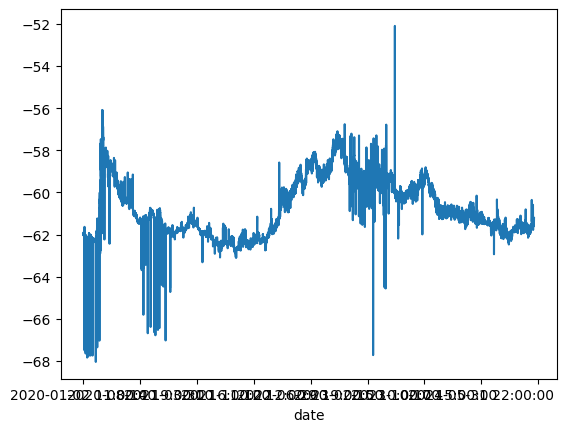

In [170]:
asset1 = selector.assets['vxx']
asset2 = selector.assets['emb']
basket = bt.Basket([asset1, asset2])
basket.initialise()
basket.spread.plot()

In [172]:
params = {
    "amount" : 5000,
    "proportion" : 0.5,
    "window" : basket.half_life,
    "threshold_entry" : 1,
    "exit" : 1,
    "security": 1,
    "intesity" : 1,
    "drift": 1,
    "slippage": 0,
}
backtest = bt.BasketTrading(basket, params)
backtest.run()

110it [00:52,  2.08it/s]


UnboundLocalError: cannot access local variable 'level_exit' where it is not associated with a value

Equity Initial [$]                   5000
Equity Final [$]                  4748.72
Return [%]                        -5.0256
Volatility                       0.664119
Sharpe                          -0.075673
Positions                              10
Skew                            -2.405201
Kurtosis                         6.318921
Total Profit                      1292.37
Total Loss                        -956.37
Profit Factor                   -1.351328
Average Pnl                     37.333333
Average Profit                 184.624286
Average Loss                     -478.185
Average Time Position    65 days 15:53:20
Average Slippage                      0.0
Max Drawdown                    -0.252385
dtype: object


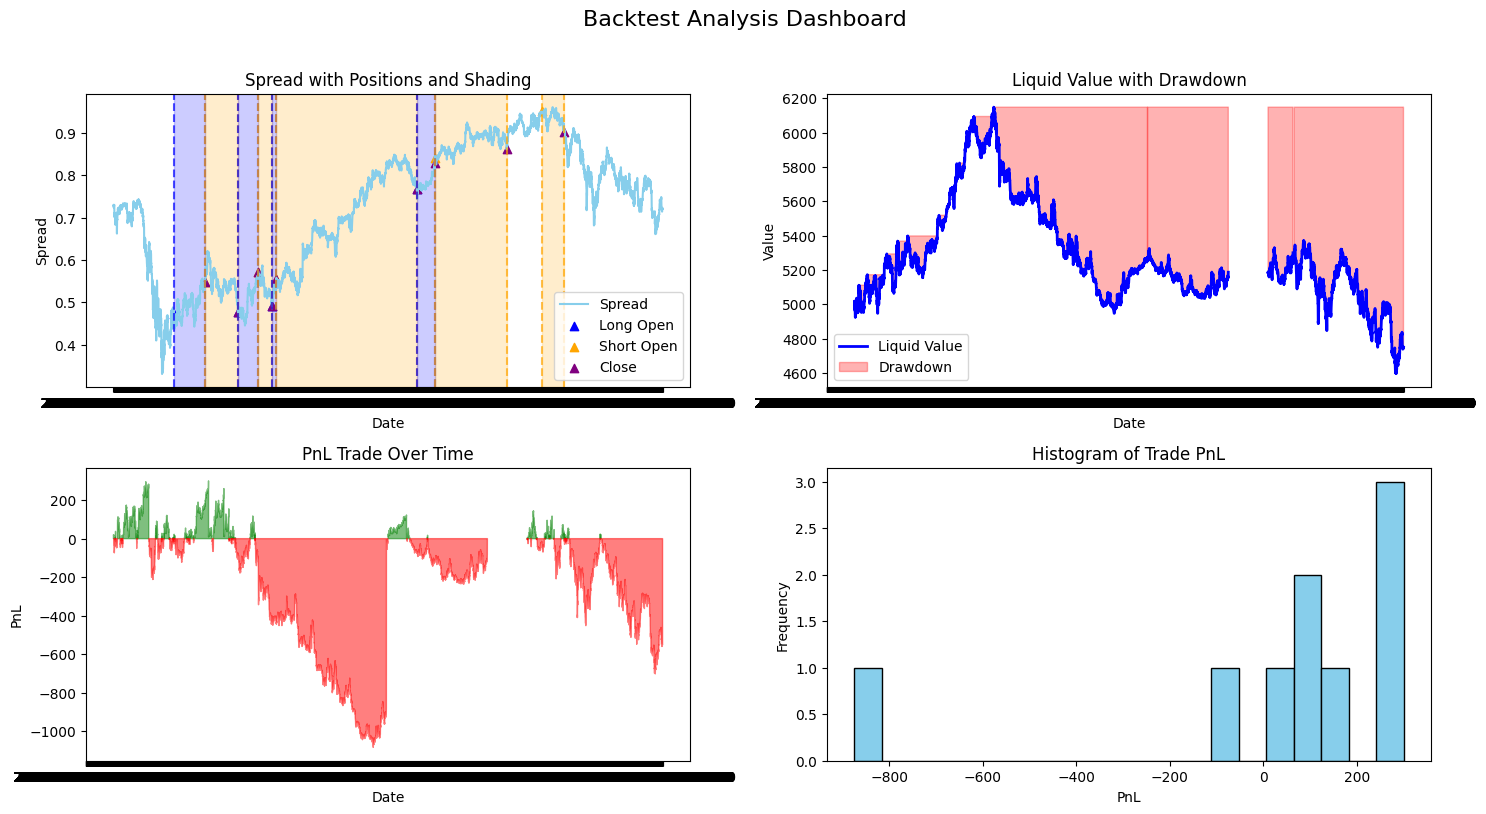

In [116]:
report = bt.Report(backtest)
rep = report.plot_report()

In [101]:
test = selector.stats.sort_values('Half Life')